

#**Airbnb EDA and preprocess**
**Hyun Kyoung Baik - University of Connecticut**

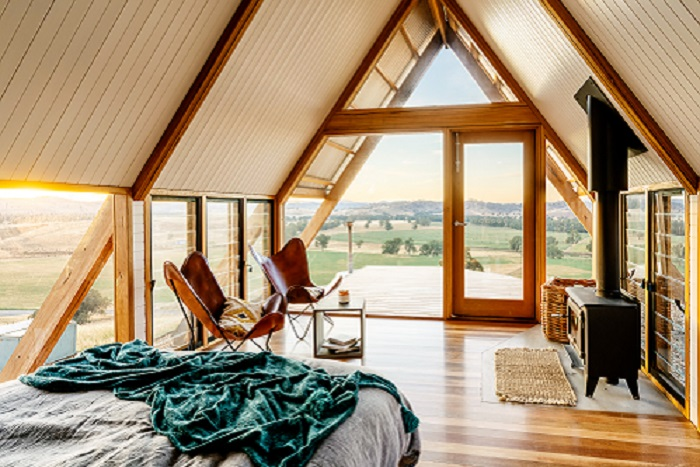

-------------------------------------------------



Have you used the Airbnb when you travel all around the world? Home sharing business has become popular in these days, and it's normal to find other's home when we visited not familiar places. Staying Airbnb make us feel special like a local residence. Because this is a platform business, and people decide where to stay or live based on the information on the platform, and rating is the crucial factor. So, predicting the review rating is important to the house owner. I am going to conduct Exploratory Data Analysis (EDA) of Airbnb Italy dataset for this dataset to make more prepare to predict future rating.

##*Problem Statement*


>1. How the ratings are distributed from 1 to 5? How many 5 ratings are in the total rating review? 
2. Which factors are more significant for customers to decide the accomodation is a good place to stay
3. Is the reputation of 'Super Host' related to the good review_rating? 
4. What types of amenities are the most important for host to prepare their customers
5. what is the range of price, and what is the most common price. 
6. what is related to the bad rating? 




## **1. Import Module**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

##**2. Mount the google drive and import dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/02_Graduate school/03_MS BAPM/'22 Fall/4_OPIM5604 Predictive Modeling/'22 assignment/221015_Project 1/Raw file/listings.csv/listings.csv")

##**3. Data Exploration**



In [ ]:
print('This is dataset of Airbnb:')
df.head()

This is dataset of Airbnb:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10262403,https://www.airbnb.com/rooms/10262403,20220914194856,2022-09-14,city scrape,Villa Castiglione - Camera Deluxe vista giardino,Casa Vacanze sulle colline Toscane dove rilass...,"La tranquillità, il panorama la campagna e all...",https://a0.muscache.com/pictures/miso/Hosting-...,52763923,...,4.43,4.89,4.71,NaN,t,3,0,3,0,0.42
1,17976643,https://www.airbnb.com/rooms/17976643,20220914194856,2022-09-14,city scrape,Villa Palagio II - apartment 2 levels,Villa Palagio is an ancient building in natura...,NaN,https://a0.muscache.com/pictures/fdc47c2e-bde3...,1046601,...,5.00,4.90,4.76,NaN,t,2,2,0,0,0.35
2,693802725140450777,https://www.airbnb.com/rooms/693802725140450777,20220914194856,2022-09-14,city scrape,Villetta Gabriella-matrimoniale king-bagno pri...,Ideale per famiglie con un figlio,"Località ""Rose"" <br />Fermata bus n° 37 per st...",https://a0.muscache.com/pictures/miso/Hosting-...,11012232,...,5.00,4.50,4.00,NaN,f,2,0,2,0,2.00
3,52254709,https://www.airbnb.com/rooms/52254709,20220914194856,2022-09-14,city scrape,Elegant room with terrace and private bathroom,Relax in this quiet space in a central positio...,It is located in the heart of Fiesole.<br /><b...,https://a0.muscache.com/pictures/15ae0f4d-209a...,42188644,...,5.00,5.00,5.00,NaN,f,3,1,2,0,0.43
4,3558371,https://www.airbnb.com/rooms/3558371,20220914194856,2022-09-14,city scrape,"Relax totale: piscina panoramica, Firenze a 7 km","A 7 km da Firenze, il nostro Agriturismo è met...","Pur vicinissimi alla città, potrete trascorrer...",https://a0.muscache.com/pictures/miso/Hosting-...,17914360,...,4.83,4.92,4.67,NaN,t,5,0,5,0,0.91


In [ ]:
# This dataset has 75 coulmns and 11,138 rows. 
print(df.shape)
print(df.info())

(11138, 75)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11138 entries, 0 to 11137
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            11138 non-null  int64  
 1   listing_url                                   11138 non-null  object 
 2   scrape_id                                     11138 non-null  int64  
 3   last_scraped                                  11138 non-null  object 
 4   source                                        11138 non-null  object 
 5   name                                          11136 non-null  object 
 6   description                                   10979 non-null  object 
 7   neighborhood_overview                         6849 non-null   object 
 8   picture_url                                   11138 non-null  object 
 9   host_id                                       111

In [ ]:
#Let's explore that what kinds of features do I have in this data 
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

###**1) Missing Values Check**

There are 75 variables and 11,138 rows in this dataset. Among the variables, I will remove some varibles based on the criteria

1. URL : not related to the analysis
2. identify variables
3. pictures 
4. decriptions


In [ ]:
df=df.drop(['host_id','id','listing_url','scrape_id','last_scraped','source','name','description',
          'neighborhood_overview','picture_url','host_url','host_name','host_thumbnail_url',
          'host_since','host_location','host_about','host_acceptance_rate','host_picture_url','host_listings_count',
          'host_verifications','host_has_profile_pic','host_identity_verified','neighbourhood','neighbourhood_group_cleansed',
          'property_type','bathrooms_text','maximum_nights','maximum_minimum_nights','minimum_minimum_nights','minimum_maximum_nights', 
          'maximum_nights_avg_ntm','calendar_updated','has_availability', 'availability_30', 'availability_60',
          'availability_90', 'calendar_last_scraped','number_of_reviews','number_of_reviews_l30d','first_review','last_review',
          'license','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
          'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month',
          'maximum_maximum_nights','host_neighbourhood'],axis=1)

In [ ]:
df.shape

(11138, 25)

Remaining features are as follow.
- host response time and rate
- host is superhost
- count of host total listing
- neighborhood cleansed
- location (latitude, longtitude)
- room type, accommodation
- beds, amenities etc
- price
- minimum nights: how long customers can stay the accomodate 
- availability: how many days customers can book for staying
- number of reviews
- **review_score_rating : Our target variable**
- specified review scores : <br>
&nbsp; &nbsp; Accuracy: Was it accurately represented with up-to-date photos and info? <br>
&nbsp; &nbsp; Cleanliness: Did the place meet standards of Airbnb <br>
&nbsp; &nbsp; Check in: Should be easy <br>
&nbsp; &nbsp; Communication: Did the Host respond to messages promptly <br>
&nbsp; &nbsp; Value: Should be easy <br>





In [ ]:
df.isnull().sum()

host_response_time              1648
host_response_rate              1648
host_is_superhost                  5
host_total_listings_count          0
neighbourhood_cleansed             0
latitude                           0
longitude                          0
room_type                          0
accommodates                       0
bathrooms                      11138
bedrooms                         346
beds                             108
amenities                          0
price                              0
minimum_nights                     0
minimum_nights_avg_ntm             0
availability_365                   0
number_of_reviews_ltm              0
review_scores_rating            1537
review_scores_accuracy          1583
review_scores_cleanliness       1583
review_scores_checkin           1585
review_scores_communication     1585
review_scores_location          1585
review_scores_value             1586
dtype: int64

In [ ]:
for col in df.columns:
  pct_missing=round(np.mean(df[col].isnull()),3)
  print('{}:{}%'.format(col,pct_missing))

host_response_time:0.148%
host_response_rate:0.148%
host_is_superhost:0.0%
host_total_listings_count:0.0%
neighbourhood_cleansed:0.0%
latitude:0.0%
longitude:0.0%
room_type:0.0%
accommodates:0.0%
bathrooms:1.0%
bedrooms:0.031%
beds:0.01%
amenities:0.0%
price:0.0%
minimum_nights:0.0%
minimum_nights_avg_ntm:0.0%
availability_365:0.0%
number_of_reviews_ltm:0.0%
review_scores_rating:0.138%
review_scores_accuracy:0.142%
review_scores_cleanliness:0.142%
review_scores_checkin:0.142%
review_scores_communication:0.142%
review_scores_location:0.142%
review_scores_value:0.142%


The portion of missing value is under 2%, it seems that we can simply drop the missing values.

In [ ]:
df=df.drop(['bathrooms'],axis=1)  # I dropped the 'bathrooms' because there are no values in the column

print(df.shape)
print(df.columns)

(11138, 24)
Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'minimum_nights_avg_ntm',
       'availability_365', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value'],
      dtype='object')


In [ ]:
tmp=df[df.isna().any(axis=1)] #Let's explore the rows with missing value. 
tmp

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,...,minimum_nights_avg_ntm,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
5,within an hour,92%,f,1365,Gavinana Galluzzo,43.727440,11.283190,Entire home/apt,2,1.0,...,1.5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,within an hour,100%,f,5,Campo di Marte,43.769370,11.335894,Private room,2,1.0,...,2.0,105,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,within an hour,100%,f,1961,Gavinana Galluzzo,43.726479,11.282847,Entire home/apt,4,2.0,...,2.0,267,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,within a day,90%,f,13,Gavinana Galluzzo,43.708610,11.209390,Entire home/apt,2,1.0,...,1.0,249,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,f,236,Gavinana Galluzzo,43.726720,11.283010,Entire home/apt,4,2.0,...,90.0,69,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,within an hour,100%,f,5,Campo di Marte,43.769370,11.335894,Private room,2,1.0,...,3.0,105,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11127,NaN,NaN,f,220,Gavinana Galluzzo,43.726640,11.282850,Entire home/apt,2,1.0,...,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11133,within an hour,100%,f,1961,Gavinana Galluzzo,43.726479,11.283007,Entire home/apt,4,2.0,...,2.0,268,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11136,within an hour,100%,f,3,Gavinana Galluzzo,43.719460,11.214610,Private room,4,1.0,...,1.2,327,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When I considered the number of total rows with missing values, it is 3097 rows. That is 27% of total dataset, I can't simply drop the values. I need to consider other ways to deal with missing values. 


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11138 entries, 0 to 11137
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           9490 non-null   object 
 1   host_response_rate           9490 non-null   object 
 2   host_is_superhost            11133 non-null  object 
 3   host_total_listings_count    11138 non-null  int64  
 4   neighbourhood_cleansed       11138 non-null  object 
 5   latitude                     11138 non-null  float64
 6   longitude                    11138 non-null  float64
 7   room_type                    11138 non-null  object 
 8   accommodates                 11138 non-null  int64  
 9   bedrooms                     10792 non-null  float64
 10  beds                         11030 non-null  float64
 11  amenities                    11138 non-null  object 
 12  price                        11138 non-null  object 
 13  minimum_nights  

#### Review related columns

In [ ]:
cols_1=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
        'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
        'review_scores_location','review_scores_value']
df_subset_1=df.loc[:,cols_1]
df_subset_1

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,4.68,4.50,4.71,4.71,4.68,4.43,4.89,4.71
1,4.90,4.95,5.00,5.00,5.00,5.00,4.90,4.76
2,4.00,4.50,4.50,4.50,5.00,5.00,4.50,4.00
3,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
4,4.83,4.92,4.92,4.92,5.00,4.83,4.92,4.67
...,...,...,...,...,...,...,...,...
11133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11134,4.63,4.66,4.83,4.83,4.88,4.88,4.73,4.63
11135,5.00,4.91,4.91,4.91,5.00,5.00,4.91,4.82
11136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_subset_1[df_subset_1.isna().any(axis=1)]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
11125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
        'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
        'review_scores_location','review_scores_value'] <br>

Above columns have common missing values of 1587. They don't have any information related to the review scores, even don't have target value. I dropped the missing values 

In [ ]:
df.dropna(subset=cols_1, inplace=True)

In [ ]:
df.isna().sum()

host_response_time             1187
host_response_rate             1187
host_is_superhost                 2
host_total_listings_count         0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bedrooms                        295
beds                             75
amenities                         0
price                             0
minimum_nights                    0
minimum_nights_avg_ntm            0
availability_365                  0
number_of_reviews_ltm             0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
dtype: int64

In [ ]:
print(df['host_response_time'].dtypes)
df['host_response_time'].unique()

object


array(['within an hour', 'a few days or more', 'within a few hours',
       'within a day', nan], dtype=object)

In [ ]:
print(df['host_response_time'].dtypes)
df['host_response_rate'].unique()

object


array(['100%', '0%', nan, '71%', '90%', '80%', '98%', '67%', '93%', '50%',
       '83%', '94%', '86%', '75%', '89%', '97%', '70%', '99%', '88%',
       '96%', '33%', '92%', '38%', '40%', '74%', '95%', '87%', '58%',
       '91%', '77%', '44%', '24%', '60%', '41%', '25%', '69%', '84%',
       '79%', '56%', '64%', '78%', '30%', '82%', '68%', '85%', '36%',
       '81%'], dtype=object)

In [ ]:
print('Value distribution of host_response_time: \n','\n',df['host_response_time'].value_counts(),'\n')
print('Value distribution of host_response_rate: \n','\n',df['host_response_rate'].value_counts())

Value distribution of host_response_time: 
 
 within an hour        6991
within a few hours     817
within a day           446
a few days or more     110
Name: host_response_time, dtype: int64 

Value distribution of host_response_rate: 
 
 100%    6704
99%      295
96%      221
90%      201
98%      164
97%       78
0%        74
95%       64
80%       54
93%       52
92%       46
50%       45
94%       39
75%       31
70%       30
77%       26
91%       26
67%       22
86%       22
83%       19
89%       17
87%       16
33%       13
88%       12
69%       12
60%       10
64%        7
84%        7
40%        6
78%        6
56%        6
82%        6
25%        5
74%        4
71%        4
24%        3
58%        3
41%        2
79%        2
44%        2
85%        2
81%        2
38%        1
30%        1
68%        1
36%        1
Name: host_response_rate, dtype: int64


In [ ]:
# Impute remaining missing values with their mode 

mode=df['host_response_time'].mode()[0]
df['host_response_time'].fillna(mode, inplace=True)

mode=df['host_response_rate'].mode()[0]
df['host_response_rate'].fillna(mode, inplace=True)

mode=df['host_is_superhost'].mode()[0]
df['host_is_superhost'].fillna(mode, inplace=True)

mode=df['bedrooms'].mode()[0]
df['bedrooms'].fillna(mode, inplace=True)

mode=df['beds'].mode()[0]
df['beds'].fillna(mode, inplace=True)

I decided to use this mode to estimate the remaining attributes with missing values. Because the distributions were unbalanced, using the mean might further skew the data results

In [ ]:
df.isna().sum()

host_response_time             0
host_response_rate             0
host_is_superhost              0
host_total_listings_count      0
neighbourhood_cleansed         0
latitude                       0
longitude                      0
room_type                      0
accommodates                   0
bedrooms                       0
beds                           0
amenities                      0
price                          0
minimum_nights                 0
minimum_nights_avg_ntm         0
availability_365               0
number_of_reviews_ltm          0
review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 11135
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           9551 non-null   object 
 1   host_response_rate           9551 non-null   object 
 2   host_is_superhost            9551 non-null   object 
 3   host_total_listings_count    9551 non-null   int64  
 4   neighbourhood_cleansed       9551 non-null   object 
 5   latitude                     9551 non-null   float64
 6   longitude                    9551 non-null   float64
 7   room_type                    9551 non-null   object 
 8   accommodates                 9551 non-null   int64  
 9   bedrooms                     9551 non-null   float64
 10  beds                         9551 non-null   float64
 11  amenities                    9551 non-null   object 
 12  price                        9551 non-null   object 
 13  minimum_nights   

###**2) Outlier analysis**



In [ ]:
df.describe()

,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,minimum_nights_avg_ntm,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,29.157156,43.773653,11.253854,3.761805,1.494817,2.249084,3.847974,4.065375,170.123233,15.386870,4.714594,4.780747,4.753193,4.828949,4.823915,4.814151,4.686925
std,90.625796,0.011667,0.018707,1.974208,0.834310,1.548397,25.206696,24.674445,126.870545,19.894895,0.363169,0.336547,0.356953,0.297250,0.317517,0.274797,0.359561
min,1.000000,43.706560,11.131620,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,43.768515,11.245760,2.000000,1.000000,1.000000,1.000000,1.400000,42.000000,1.000000,4.610000,4.730000,4.670000,4.790000,4.790000,4.730000,4.600000
50%,4.000000,43.772514,11.254117,4.000000,1.000000,2.000000,2.000000,2.000000,171.000000,7.000000,4.810000,4.880000,4.860000,4.920000,4.930000,4.910000,4.780000
75%,12.000000,43.777800,11.261385,4.000000,2.000000,3.000000,3.000000,3.000000,296.500000,22.000000,4.940000,4.970000,4.970000,5.000000,5.000000,5.000000,4.890000
max,2332.000000,43.850230,11.357540,16.000000,13.000000,17.000000,1125.000000,1125.000000,365.000000,169.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


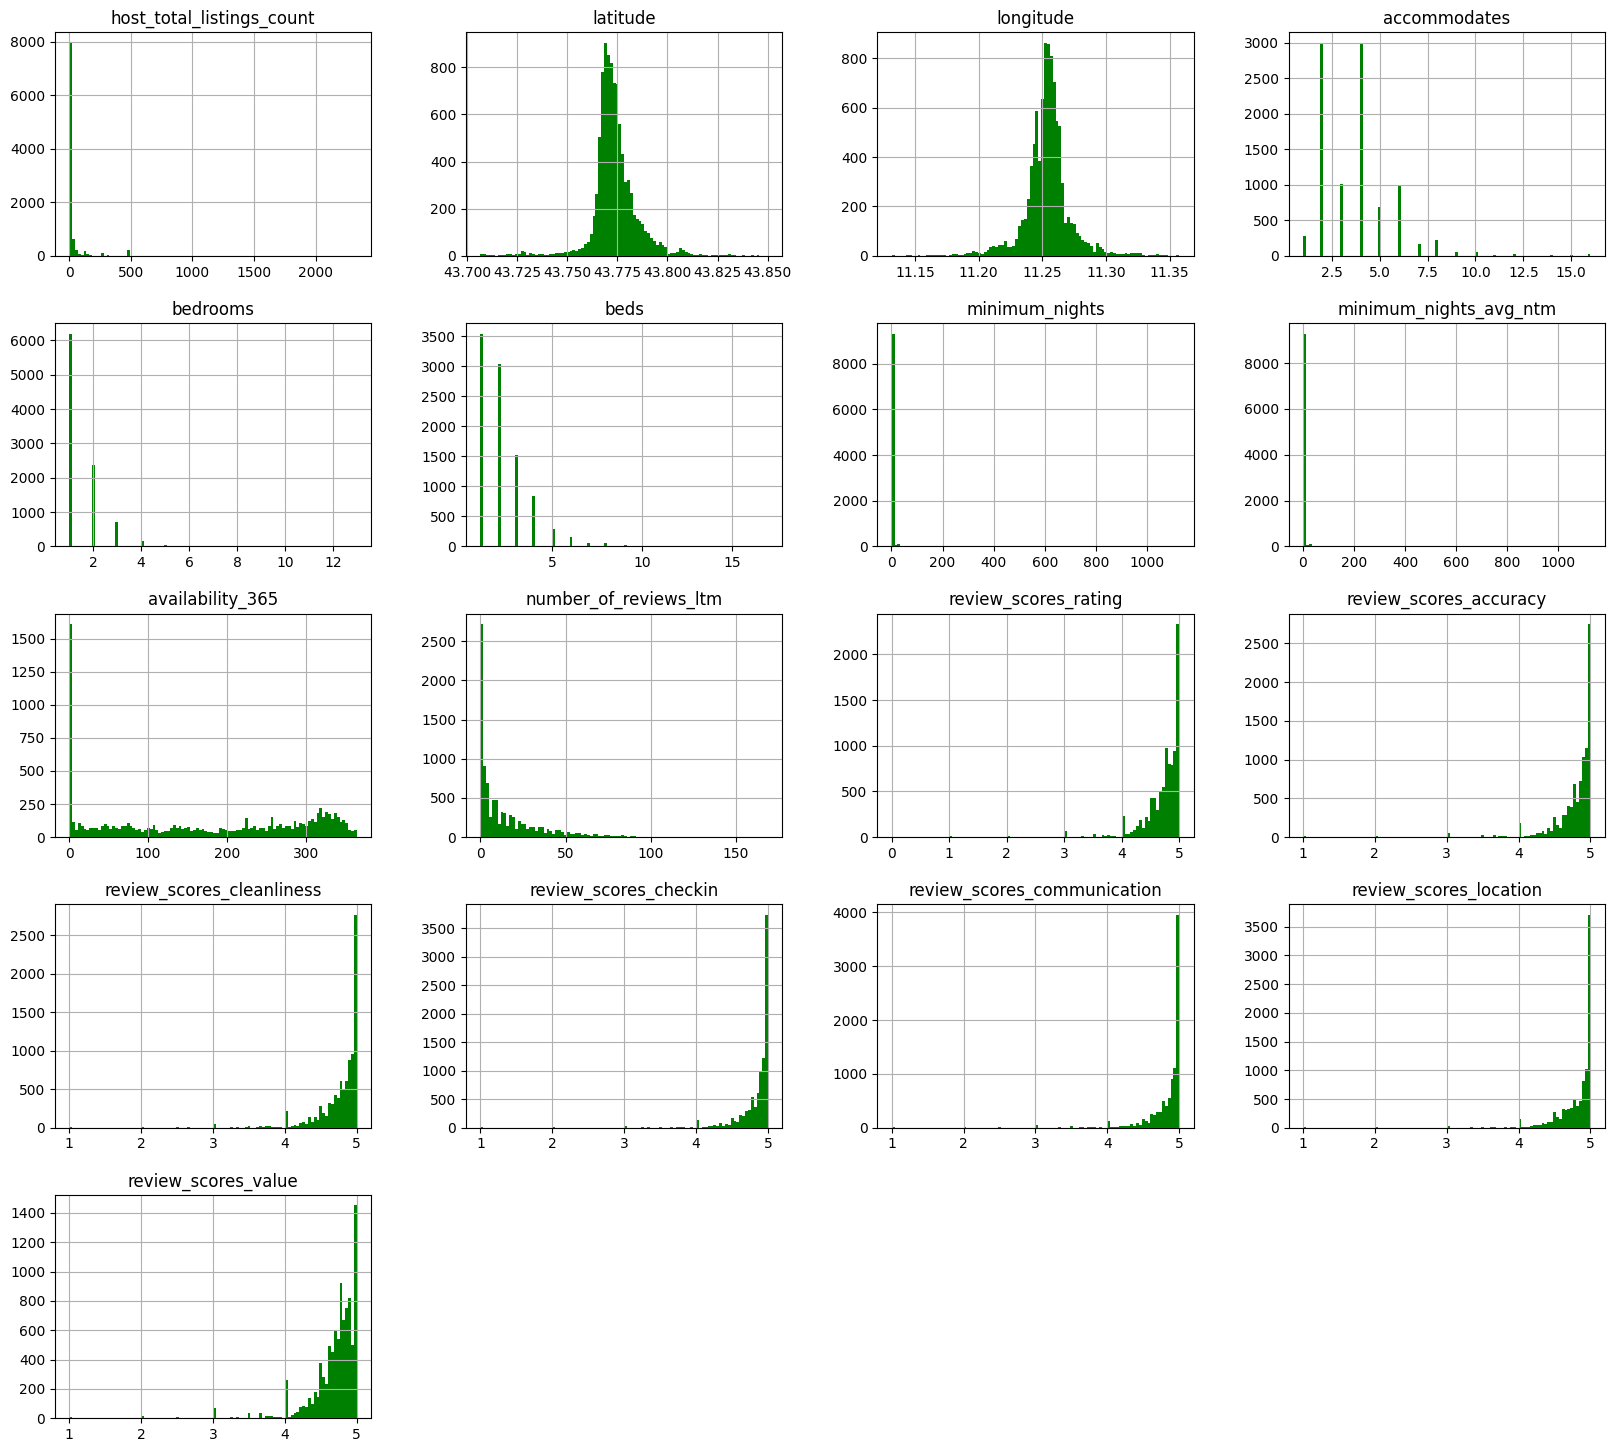

In [ ]:
df.hist(bins=100,figsize=(20,18), color='g')
plt.show()

In this histogram, many of reviews skewed toward 4 and 5.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 11135
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           9551 non-null   object 
 1   host_response_rate           9551 non-null   object 
 2   host_is_superhost            9551 non-null   object 
 3   host_total_listings_count    9551 non-null   int64  
 4   neighbourhood_cleansed       9551 non-null   object 
 5   latitude                     9551 non-null   float64
 6   longitude                    9551 non-null   float64
 7   room_type                    9551 non-null   object 
 8   accommodates                 9551 non-null   int64  
 9   bedrooms                     9551 non-null   float64
 10  beds                         9551 non-null   float64
 11  amenities                    9551 non-null   object 
 12  price                        9551 non-null   object 
 13  minimum_nights   

In [ ]:
num_cols=df.iloc[:,[3,5,6,8,9,10,13,14,15,16,17,18,19,20,21,22,23]] #subset the dataset with continuous variables 

In [ ]:
df_nums=df[num_cols.columns]
df_nums

,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,minimum_nights_avg_ntm,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,3,43.71911,11.21204,4,2.0,13.0,1,1.2,325,5,4.68,4.50,4.71,4.68,4.43,4.89,4.71
1,2,43.78000,11.33764,4,2.0,2.0,2,2.0,225,0,4.90,4.95,5.00,5.00,5.00,4.90,4.76
2,2,43.71225,11.22664,3,1.0,2.0,1,1.0,344,2,4.00,4.50,4.50,5.00,5.00,4.50,4.00
3,3,43.80636,11.29598,1,1.0,1.0,2,2.0,344,4,5.00,5.00,5.00,5.00,5.00,5.00,5.00
4,5,43.77402,11.34596,2,1.0,1.0,2,2.0,220,9,4.83,4.92,4.92,5.00,4.83,4.92,4.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11130,2,43.78230,11.30068,2,1.0,1.0,2,2.0,43,23,4.94,4.95,4.97,4.98,4.97,4.87,4.82
11131,16,43.72798,11.28070,5,2.0,5.0,2,2.8,354,6,4.77,4.64,4.91,4.90,4.73,5.00,4.67
11132,4,43.80740,11.29871,3,1.0,1.0,1,1.4,339,1,4.88,4.75,4.88,4.75,4.63,5.00,4.75
11134,3,43.78445,11.30222,6,1.0,4.0,2,2.0,123,5,4.63,4.66,4.83,4.88,4.88,4.73,4.63


In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

skw=df_nums.apply(skew)
print('Skewness of numerical features:\n',skw,'\n')
kur=df_nums.apply(kurtosis)
print('\nKurtosis of numerical features:\n',kur)

Skewness of numerical features:
 host_total_listings_count       6.416569
latitude                       -0.117855
longitude                      -0.085269
accommodates                    1.839830
bedrooms                        2.828275
beds                            2.731892
minimum_nights                 31.532849
minimum_nights_avg_ntm         32.185304
availability_365               -0.037510
number_of_reviews_ltm           1.918246
review_scores_rating           -3.700718
review_scores_accuracy         -4.625748
review_scores_cleanliness      -3.944395
review_scores_checkin          -5.007306
review_scores_communication    -5.034317
review_scores_location         -4.135539
review_scores_value            -3.652429
dtype: float64 


Kurtosis of numerical features:
 host_total_listings_count        73.370760
latitude                          7.681250
longitude                         6.041099
accommodates                      6.582373
bedrooms                         16.520594
beds

Considering the skewness and kurtosis, this dataset is not normally distributed. 

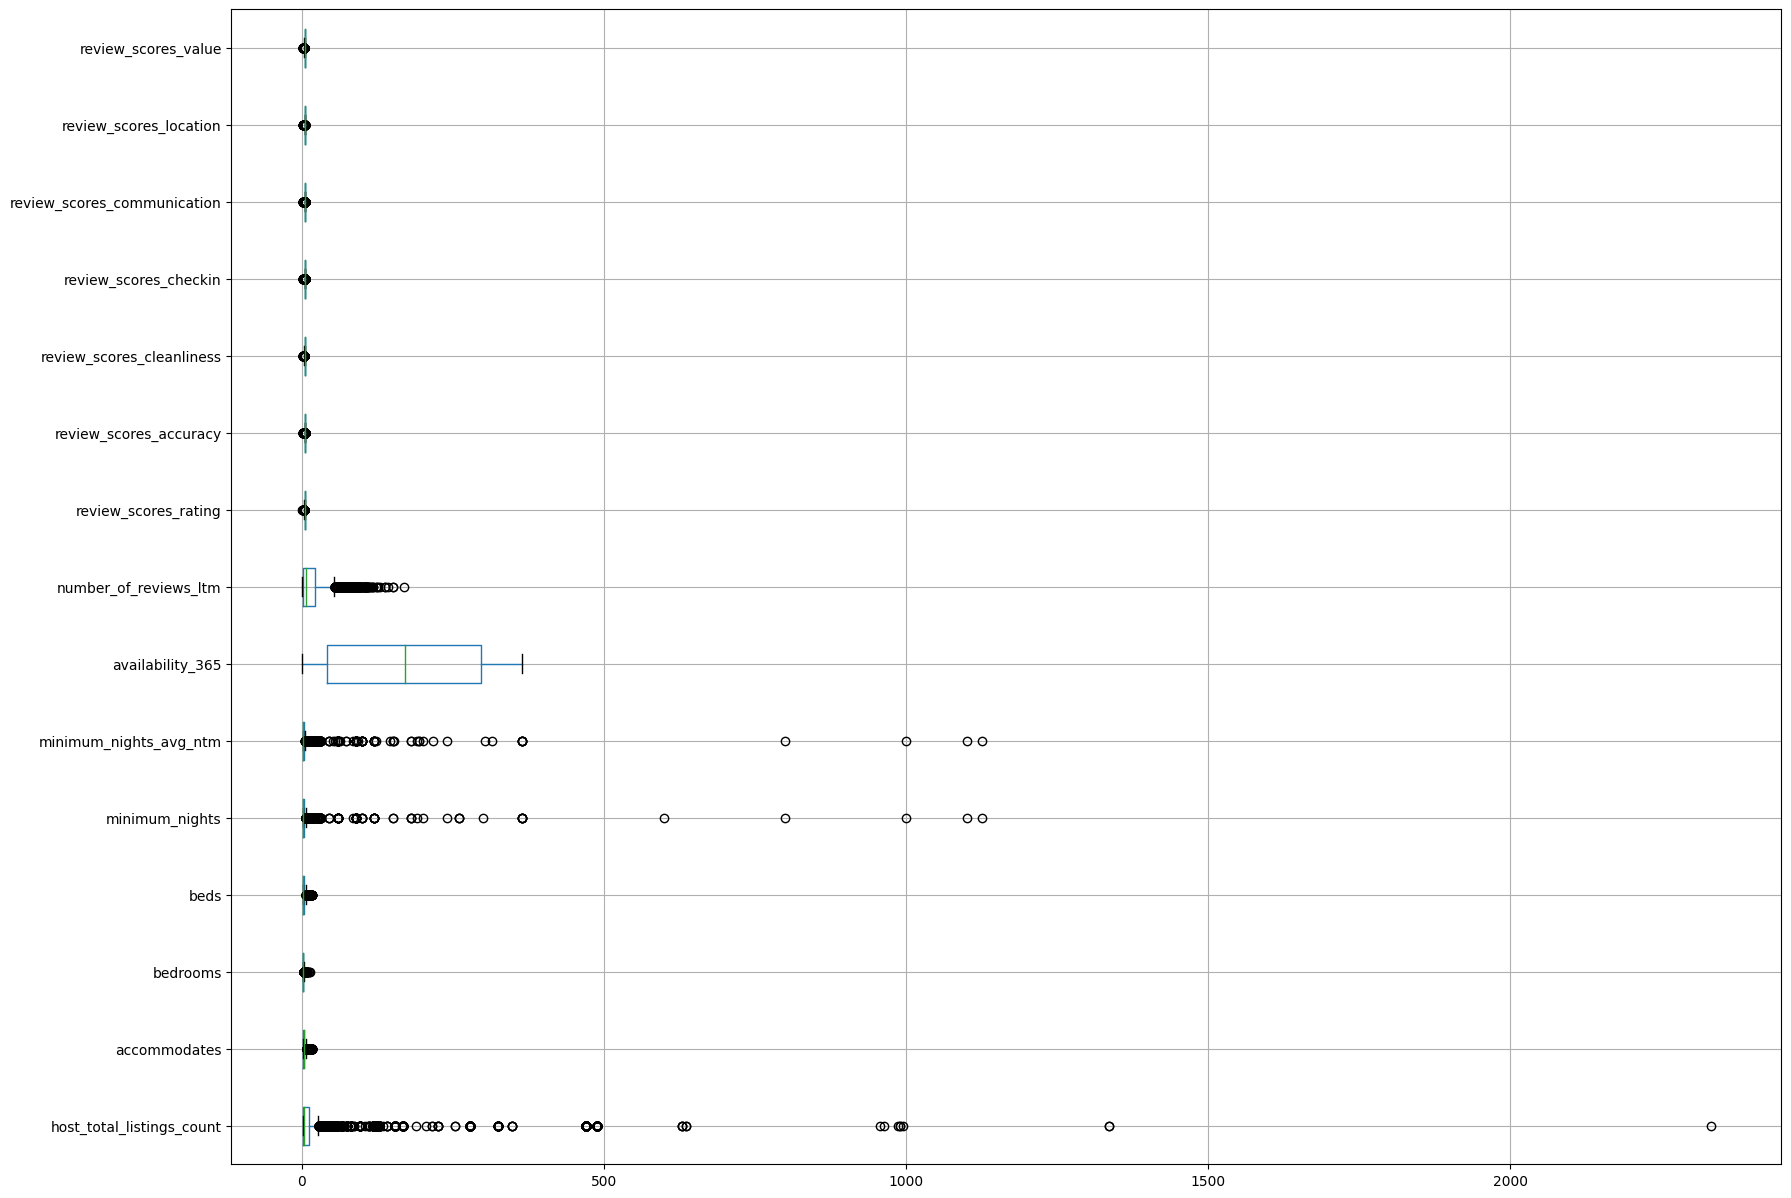

In [ ]:
plt.figure(figsize=(20,15))
df.boxplot(['host_total_listings_count', 'accommodates','bedrooms','beds','minimum_nights','minimum_nights_avg_ntm','availability_365',	'number_of_reviews_ltm',
            'review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',	'review_scores_value'],vert=False)
plt.show()

number_of_reviews_ltm, min_nights_avg_ntm, min_night, host_total_listings_count shows clear outliers compare to other features.

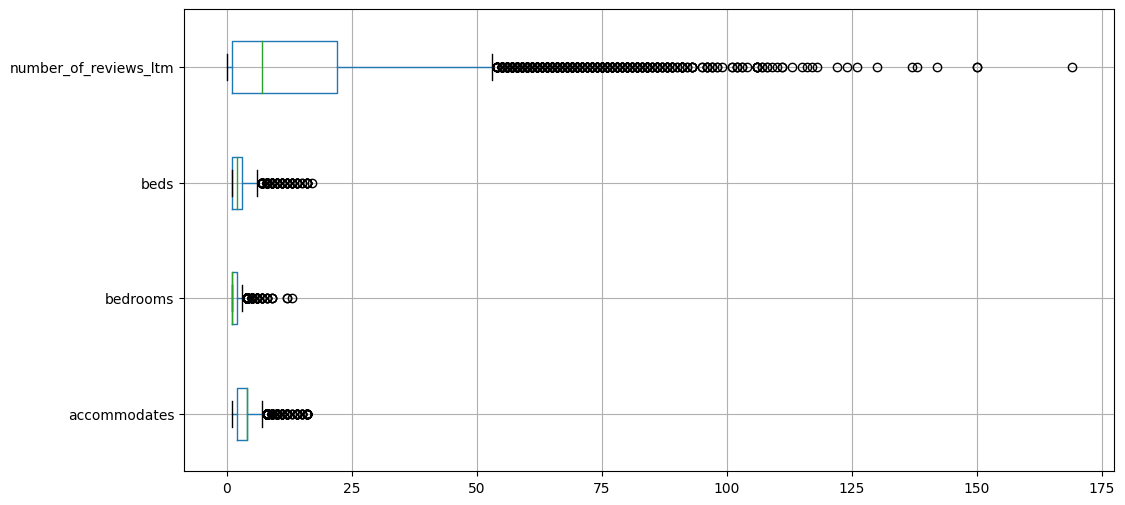

In [ ]:
# Although beds, bedrooms, accomodates seems to have many outliers,I am unable to check the distribution clearly.
# To explore more about above four features, I draw a box plot seperately. 

plt.figure(figsize=(12,6))
df.boxplot(['accommodates','bedrooms','beds','number_of_reviews_ltm'],vert=False)
plt.show()

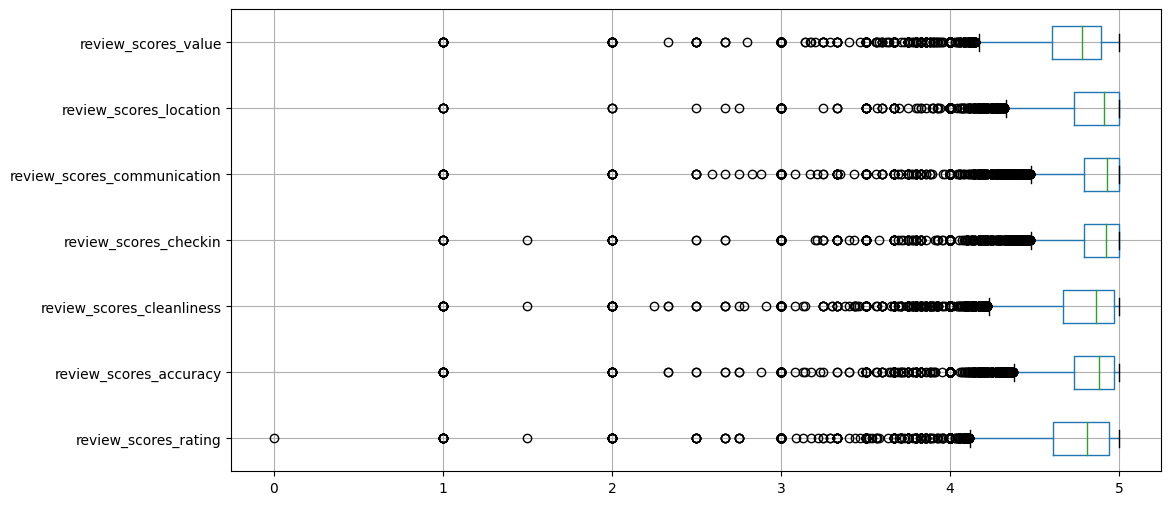

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot(['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',	'review_scores_value'],vert=False)
plt.show()

According to the box plot, most of features have outliers. From the review_scores box plot, we can see that under 4.5 ratings considered outlier, and average scores are close to rating of 5.

###**3) Correlation**

In [ ]:
#Change the object types into 

df_numerize=df

for col_name in df_numerize.columns:
  if(df_numerize[col_name].dtype=='object'):
    df_numerize[col_name]=df_numerize[col_name].astype('category')
    df_numerize[col_name]=df_numerize[col_name].cat.codes

df_numerize.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,...,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating_bins
0,3,100.0,0,3,2,43.71911,11.21204,2,4,2,...,325,5,4.68,4.50,4.71,4.68,4.43,4.89,4.71,5
1,3,100.0,1,2,0,43.78000,11.33764,0,4,2,...,225,0,4.90,4.95,5.00,5.00,5.00,4.90,4.76,5
2,3,100.0,0,2,2,43.71225,11.22664,2,3,1,...,344,2,4.00,4.50,4.50,5.00,5.00,4.50,4.00,4
3,3,100.0,1,3,0,43.80636,11.29598,2,1,1,...,344,4,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5
4,3,100.0,0,5,0,43.77402,11.34596,2,2,1,...,220,9,4.83,4.92,4.92,5.00,4.83,4.92,4.67,5


<Axes: >

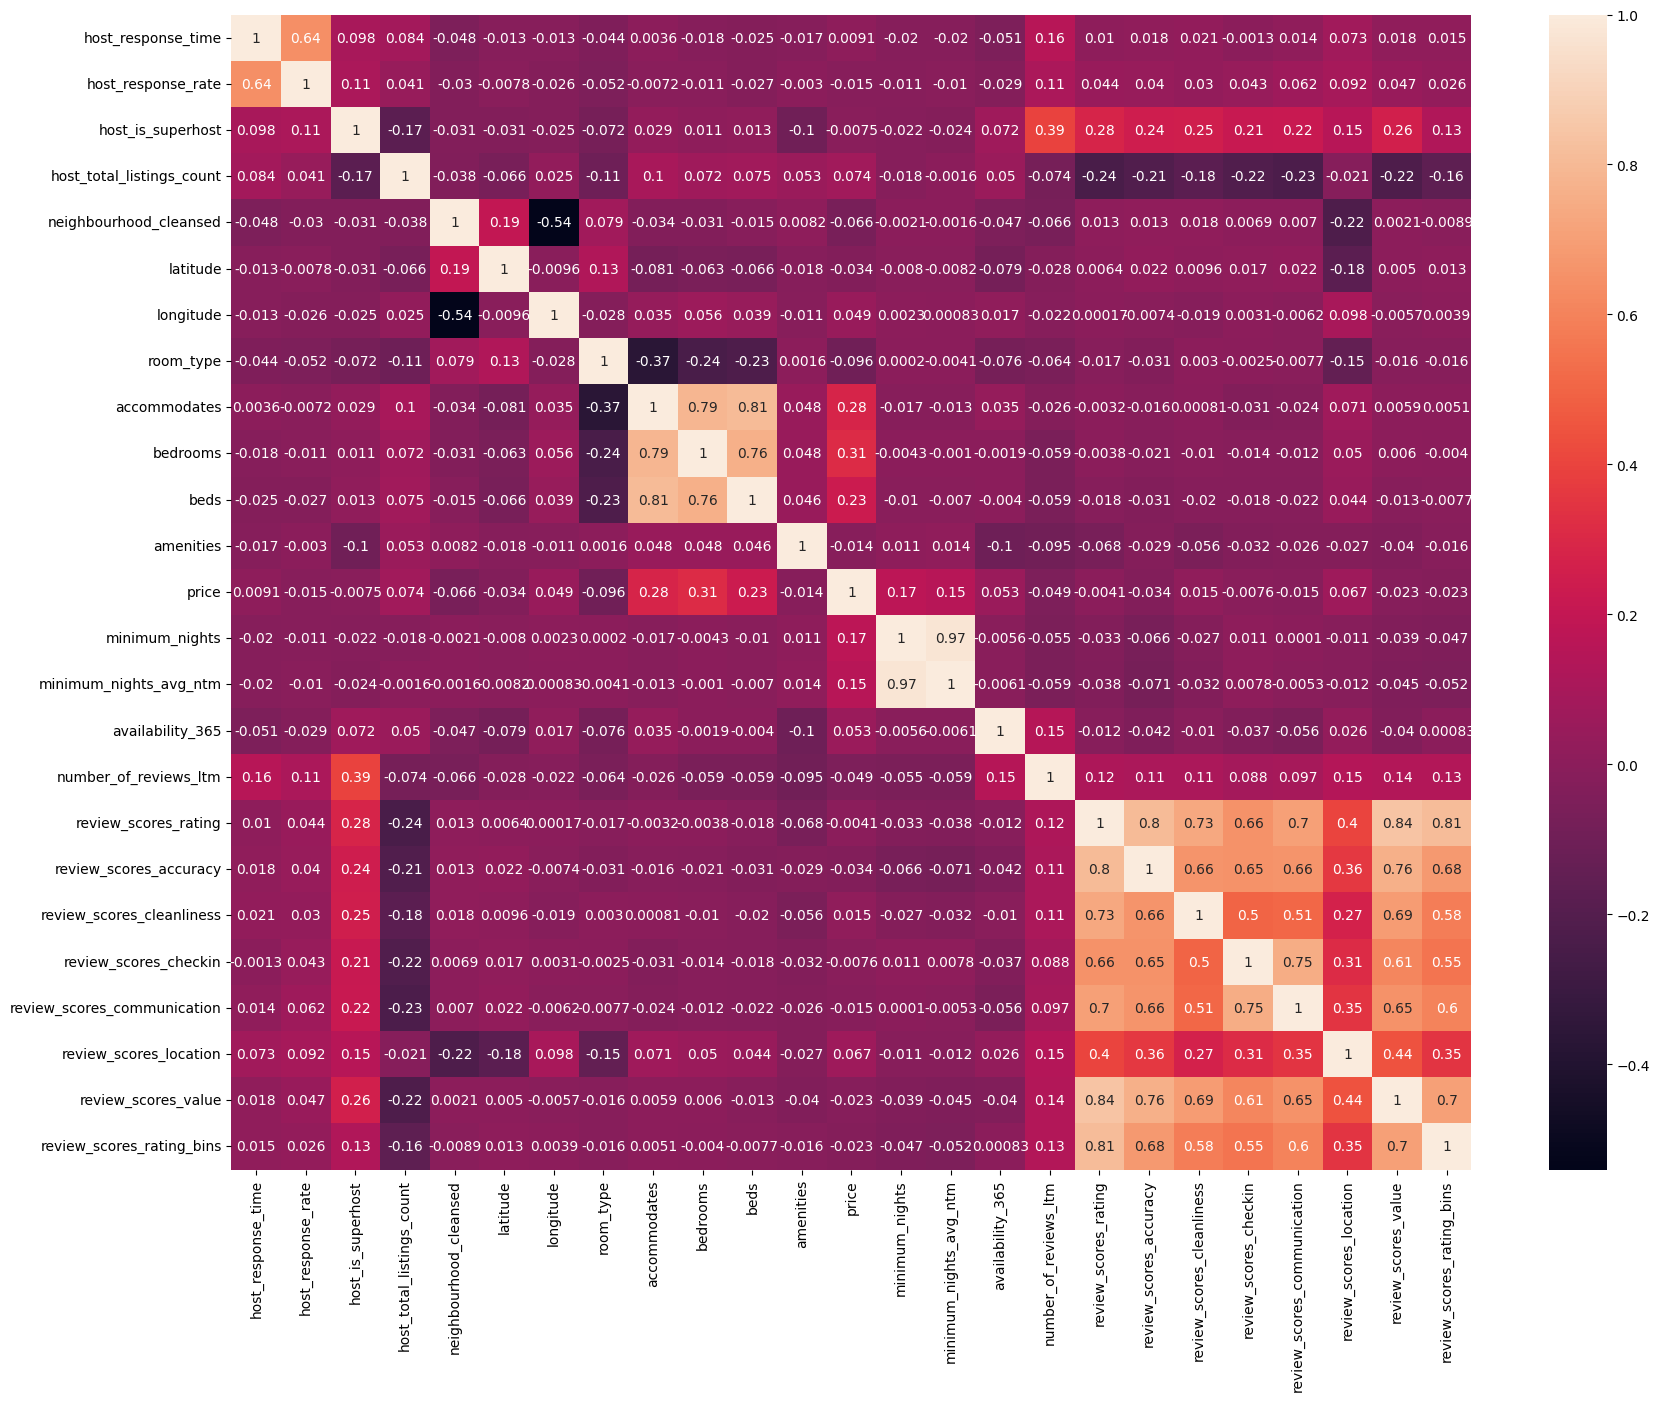

In [ ]:
num_cols=[col for col in df.columns if df[col].dtypes !="0"]
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

- This heatmap shows correlationship of each features. Our target is review_scores_rating. The correlations of Review_scores_accuracy, review_scores_cleanliness, review_scores_communication,review_score_value are greater than 0.7, we can assume that this feautres have multicollinearity with our target. 
- Review_scores_accuracy has strong correlationship with superhost and location.
- number of review also significant to the review_scores_rating.


###**Low rating reviews**

In [ ]:
low_rating=df[df['review_scores_rating']<=3]
low_rating

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,...,minimum_nights_avg_ntm,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
107,within a few hours,100%,f,4,Centro Storico,43.782020,11.243990,Entire home/apt,6,2.0,...,2.0,312,0,3.0,5.0,5.0,5.0,5.0,4.0,4.5
145,within an hour,100%,f,278,Centro Storico,43.769440,11.263310,Entire home/apt,2,1.0,...,3.0,0,0,3.0,4.0,4.0,4.5,3.5,4.5,4.0
178,within an hour,100%,f,1336,Gavinana Galluzzo,43.725100,11.253790,Entire home/apt,2,1.0,...,7.1,30,1,2.0,3.0,5.0,4.0,1.0,5.0,2.0
191,within an hour,100%,f,964,Gavinana Galluzzo,43.726604,11.282838,Entire home/apt,3,1.0,...,1.2,364,1,1.0,3.0,5.0,3.0,2.0,5.0,1.0
420,within an hour,100%,f,32,Centro Storico,43.774260,11.243020,Entire home/apt,6,2.0,...,7.0,0,0,3.0,3.0,3.0,4.0,4.0,4.5,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10460,within an hour,92%,f,2,Centro Storico,43.775971,11.245297,Private room,4,1.0,...,1.0,8,1,3.0,3.0,4.0,5.0,5.0,5.0,3.0
10586,within an hour,100%,f,51,Centro Storico,43.767796,11.250518,Entire home/apt,2,1.0,...,2.0,80,1,3.0,4.0,1.0,5.0,5.0,5.0,4.0
10610,within an hour,100%,f,167,Centro Storico,43.774938,11.257089,Entire home/apt,4,1.0,...,3.4,335,1,2.0,5.0,3.0,4.0,4.0,4.0,3.0
10668,within an hour,99%,f,30,Centro Storico,43.783156,11.261542,Private room,2,1.0,...,1.0,357,1,3.0,5.0,4.0,5.0,4.0,4.0,3.0


In [ ]:
low_rating['review_scores_rating'].value_counts()

3.00    64
2.00    15
1.00    10
2.50     6
2.75     4
2.67     4
0.00     1
1.50     1
Name: review_scores_rating, dtype: int64

In [ ]:
tmp=df[df['review_scores_rating']<=2]
tmp

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,...,minimum_nights_avg_ntm,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
178,within an hour,100%,f,1336,Gavinana Galluzzo,43.725100,11.253790,Entire home/apt,2,1.0,...,7.1,30,1,2.0,3.0,5.0,4.0,1.0,5.0,2.0
191,within an hour,100%,f,964,Gavinana Galluzzo,43.726604,11.282838,Entire home/apt,3,1.0,...,1.2,364,1,1.0,3.0,5.0,3.0,2.0,5.0,1.0
436,within an hour,100%,f,278,Centro Storico,43.769580,11.263510,Entire home/apt,4,1.0,...,3.0,0,0,0.0,5.0,5.0,5.0,5.0,5.0,4.0
466,within an hour,100%,f,12,Gavinana Galluzzo,43.751600,11.239680,Entire home/apt,2,1.0,...,365.0,362,0,1.0,1.0,2.0,4.0,2.0,1.0,1.0
1700,within a day,100%,f,1,Centro Storico,43.778880,11.263590,Private room,2,1.0,...,30.0,289,0,2.0,1.0,1.0,5.0,5.0,5.0,2.0
2108,within a few hours,90%,t,2,Campo di Marte,43.789630,11.267770,Entire home/apt,5,2.0,...,2.0,365,0,2.0,2.0,1.0,3.0,3.0,4.0,3.0
5553,within an hour,100%,f,3,Centro Storico,43.773125,11.263769,Private room,2,1.0,...,3.0,171,0,1.0,1.0,4.0,1.0,4.0,4.0,4.0
5726,within an hour,100%,f,278,Campo di Marte,43.780630,11.267710,Entire home/apt,6,2.0,...,3.0,44,1,2.0,2.0,1.0,5.0,3.0,3.0,2.0
5823,within an hour,100%,f,20,Centro Storico,43.773570,11.260030,Entire home/apt,2,1.0,...,1.0,150,0,2.0,4.0,5.0,4.0,3.0,5.0,2.0
6179,within a few hours,100%,f,2,Centro Storico,43.767030,11.249990,Entire home/apt,4,2.0,...,2.0,318,0,2.0,1.0,3.0,3.0,2.0,5.0,2.0


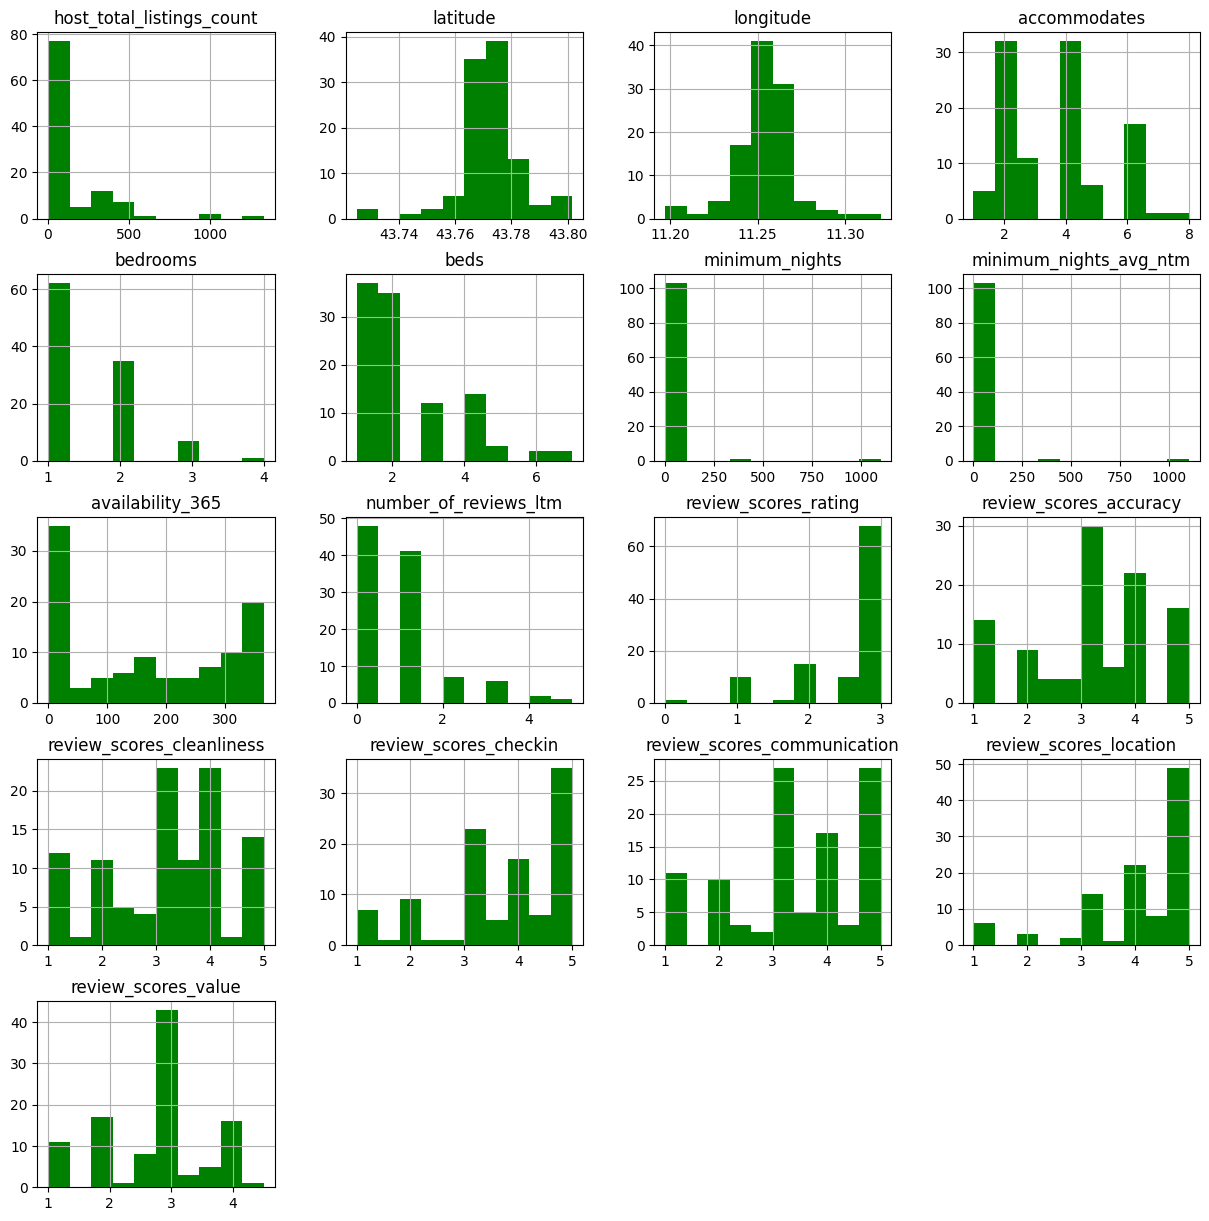

In [ ]:
low_rating.hist(figsize=(15,15), color='g')
plt.show()

I sorted the low rating scores, and explore the distribution. I can find that cleanliness,communication, value, and accuracy are critical for them to decide its bad ratings. On the other hand, the location is not much important.

##*☞ Exploratory Data Analysis conclusion*

1. In this Italy Airbnb dataset, the review_score_rating is right skewed and More than 80 of ratings are rating of 5.   
2. When referring to the heatmap and considering the correlation, we observe a strong correlation between being a superhost, the location, and the convenience of check-in. Additionally, accuracy, cleanliness, communication, and value also exhibit a high correlation, scoring above 0.7. This suggests that these features have multicollinearity with our target variable.
3. Considering the correlation, being a superhost positively affects higher ratings.
4. The host mentions the amenities in the description, and the most frequently mentioned amenities are as follows: hair dryer, heating, hot water, iron, dishes and silverware, refrigerator, cooking basics, and coffee maker.
5. The range of price is from 10 to 9223.  the average price is 157. But this is very skewed dataset, so it's difficult to generalize the distribution 
6. Ratings that are less than or equal to three are associated with cleanliness, communication, value, and accuracy. These specific features receive comparatively lower ratings compared to those with higher ratings.



##**4.Data preprocessing**


In [ ]:
for col in df.columns:
  values=df[col].value_counts()
  print('{}:\n{}%'.format(col,values),'\n')

host_response_time:
within an hour        8178
within a few hours     817
within a day           446
a few days or more     110
Name: host_response_time, dtype: int64% 

host_response_rate:
100%    7891
99%      295
96%      221
90%      201
98%      164
97%       78
0%        74
95%       64
80%       54
93%       52
92%       46
50%       45
94%       39
75%       31
70%       30
77%       26
91%       26
67%       22
86%       22
83%       19
89%       17
87%       16
33%       13
88%       12
69%       12
60%       10
64%        7
84%        7
40%        6
78%        6
56%        6
82%        6
25%        5
74%        4
71%        4
24%        3
58%        3
41%        2
79%        2
44%        2
85%        2
81%        2
38%        1
30%        1
68%        1
36%        1
Name: host_response_rate, dtype: int64% 

host_is_superhost:
f    6152
t    3399
Name: host_is_superhost, dtype: int64% 

host_total_listings_count:
1      2282
2      1375
3       851
4       684
5       462
   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 11135
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           9551 non-null   object 
 1   host_response_rate           9551 non-null   object 
 2   host_is_superhost            9551 non-null   object 
 3   host_total_listings_count    9551 non-null   int64  
 4   neighbourhood_cleansed       9551 non-null   object 
 5   latitude                     9551 non-null   float64
 6   longitude                    9551 non-null   float64
 7   room_type                    9551 non-null   object 
 8   accommodates                 9551 non-null   int64  
 9   bedrooms                     9551 non-null   float64
 10  beds                         9551 non-null   float64
 11  amenities                    9551 non-null   object 
 12  price                        9551 non-null   object 
 13  minimum_nights   

###**1) Transforming the datatype** <br>
I decided to change datatypes : bedrooms, beds, price, minimum_nights_avg_ntm.


In [ ]:
# To convert price from str to float, removed dollar sign and changed its datatype
df['price']=df['price'].replace("$","")

In [ ]:
df['price']=df['price'].str.replace("$",repl="")

<ipython-input-302-747f3a958a1e>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price']=df['price'].str.replace("$",repl="")


In [ ]:
df['price']=df['price'].str.replace(",","").astype(float)

In [ ]:
df['price'].describe()

count    9551.000000
mean      156.393153
std       269.720602
min        10.000000
25%        71.000000
50%       105.000000
75%       168.000000
max      9223.000000
Name: price, dtype: float64

In [ ]:
# Then changed remaining features from float to int
df=df.astype({'accommodates':int,'bedrooms':int,'beds':int,'minimum_nights_avg_ntm':int})

In [ ]:
# change the data type
df['host_response_rate']=df['host_response_rate'].str.replace('%','')
df['host_response_rate']=df['host_response_rate'].astype(float)

In [ ]:
df['host_response_rate'].dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 11135
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           9551 non-null   object 
 1   host_response_rate           9551 non-null   float64
 2   host_is_superhost            9551 non-null   object 
 3   host_total_listings_count    9551 non-null   int64  
 4   neighbourhood_cleansed       9551 non-null   object 
 5   latitude                     9551 non-null   float64
 6   longitude                    9551 non-null   float64
 7   room_type                    9551 non-null   object 
 8   accommodates                 9551 non-null   int64  
 9   bedrooms                     9551 non-null   int64  
 10  beds                         9551 non-null   int64  
 11  amenities                    9551 non-null   object 
 12  price                        9551 non-null   float64
 13  minimum_nights   

###**2) Binning**

In [ ]:
df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,...,minimum_nights_avg_ntm,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,within an hour,100.0,f,3,Gavinana Galluzzo,43.71911,11.21204,Private room,4,2,...,1,325,5,4.68,4.50,4.71,4.68,4.43,4.89,4.71
1,within an hour,100.0,t,2,Campo di Marte,43.78000,11.33764,Entire home/apt,4,2,...,2,225,0,4.90,4.95,5.00,5.00,5.00,4.90,4.76
2,within an hour,100.0,f,2,Gavinana Galluzzo,43.71225,11.22664,Private room,3,1,...,1,344,2,4.00,4.50,4.50,5.00,5.00,4.50,4.00
3,within an hour,100.0,t,3,Campo di Marte,43.80636,11.29598,Private room,1,1,...,2,344,4,5.00,5.00,5.00,5.00,5.00,5.00,5.00
4,within an hour,100.0,f,5,Campo di Marte,43.77402,11.34596,Private room,2,1,...,2,220,9,4.83,4.92,4.92,5.00,4.83,4.92,4.67


In [ ]:
bins=[0,1,2,3,4,5]
labels=[0,1,2,3,4,5]
df['review_scores_rating_bins']=np.searchsorted(bins,df['review_scores_rating'].values)
df.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,...,availability_365,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating_bins
0,within an hour,100.0,f,3,Gavinana Galluzzo,43.71911,11.21204,Private room,4,2,...,325,5,4.68,4.50,4.71,4.68,4.43,4.89,4.71,5
1,within an hour,100.0,t,2,Campo di Marte,43.78000,11.33764,Entire home/apt,4,2,...,225,0,4.90,4.95,5.00,5.00,5.00,4.90,4.76,5
2,within an hour,100.0,f,2,Gavinana Galluzzo,43.71225,11.22664,Private room,3,1,...,344,2,4.00,4.50,4.50,5.00,5.00,4.50,4.00,4
3,within an hour,100.0,t,3,Campo di Marte,43.80636,11.29598,Private room,1,1,...,344,4,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5
4,within an hour,100.0,f,5,Campo di Marte,43.77402,11.34596,Private room,2,1,...,220,9,4.83,4.92,4.92,5.00,4.83,4.92,4.67,5


Our target is review_scores_rating, and it is continuous variable. In order to make the rating clear, I binned the ranges into integer type of rate. 


In [ ]:
df_rev=df.drop('review_scores_rating', axis=1)

In [ ]:
# Check remaining categorical variables which are object types
tmp=df[['host_response_time','host_is_superhost','neighbourhood_cleansed','room_type','amenities']]
tmp.head()

,host_response_time,host_is_superhost,neighbourhood_cleansed,room_type,amenities
0,within an hour,f,Gavinana Galluzzo,Private room,"[""Host greets you"", ""Air conditioning"", ""Wifi""..."
1,within an hour,t,Campo di Marte,Entire home/apt,"[""Air conditioning"", ""Wifi"", ""Long term stays ..."
2,within an hour,f,Gavinana Galluzzo,Private room,"[""Cleaning products"", ""Wifi"", ""Mosquito net"", ..."
3,within an hour,t,Campo di Marte,Private room,"[""Wifi"", ""Private entrance"", ""Long term stays ..."
4,within an hour,f,Campo di Marte,Private room,"[""Wifi"", ""Crib"", ""Mosquito net"", ""Hot water"", ..."


###**3) Convert categorical variables**

In [ ]:
df_rev[['host_response_time','host_response_rate','host_is_superhost','neighbourhood_cleansed',
    'room_type','amenities']].head()

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,room_type,amenities
0,within an hour,100.0,f,Gavinana Galluzzo,Private room,"[""Host greets you"", ""Air conditioning"", ""Wifi""..."
1,within an hour,100.0,t,Campo di Marte,Entire home/apt,"[""Air conditioning"", ""Wifi"", ""Long term stays ..."
2,within an hour,100.0,f,Gavinana Galluzzo,Private room,"[""Cleaning products"", ""Wifi"", ""Mosquito net"", ..."
3,within an hour,100.0,t,Campo di Marte,Private room,"[""Wifi"", ""Private entrance"", ""Long term stays ..."
4,within an hour,100.0,f,Campo di Marte,Private room,"[""Wifi"", ""Crib"", ""Mosquito net"", ""Hot water"", ..."


In [ ]:
print(df_rev['host_response_time'].unique()) #need to binning
print(df_rev['host_response_rate'].unique()) #need to be changed to float
print(df_rev['host_is_superhost'].unique()) # 
print(df_rev['neighbourhood_cleansed'].unique())
print(df_rev['room_type'].unique())

['within an hour' 'a few days or more' 'within a few hours' 'within a day']
[100.   0.  71.  90.  80.  98.  67.  93.  50.  83.  94.  86.  75.  89.
  97.  70.  99.  88.  96.  33.  92.  38.  40.  74.  95.  87.  58.  91.
  77.  44.  24.  60.  41.  25.  69.  84.  79.  56.  64.  78.  30.  82.
  68.  85.  36.  81.]
['f' 't']
['Gavinana Galluzzo' 'Campo di Marte' 'Rifredi' 'Isolotto Legnaia'
 'Centro Storico']
['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


#### Transform amenities into individual columns

In [ ]:
# Change amenities columns to categorical variables 
print(df_rev['amenities'].unique())

['["Host greets you", "Air conditioning", "Wifi", "Long term stays allowed", "Pool", "Cable TV", "TV with standard cable", "Free parking on premises", "Hair dryer", "Breakfast", "Essentials", "Heating", "Shampoo", "Hangers"]'
 '["Air conditioning", "Wifi", "Long term stays allowed", "Free parking on premises", "Dryer", "Essentials", "Heating", "Hangers"]'
 '["Cleaning products", "Wifi", "Mosquito net", "Carbon monoxide alarm", "Hot water", "Iron", "Hair dryer", "Kitchen", "Microwave", "Freezer", "Window guards", "Private entrance", "Single level home", "Extra pillows and blankets", "Backyard", "Essentials", "Shampoo", "Hangers", "Dedicated workspace", "TV", "Dining table", "Room-darkening shades", "Bed linens", "Bidet", "Laundromat nearby", "Luggage dropoff allowed", "Host greets you", "Air conditioning", "Dishes and silverware", "Long term stays allowed", "Outdoor dining area", "Free parking on premises", "Ceiling fan", "Outdoor furniture", "Drying rack for clothing", "Body soap", "Re

In [ ]:
from collections import Counter

amnt=df_rev['amenities'].str.split('\t|,',expand=True)
word_count=Counter([word for row in amnt.values for word in row if word])
most_common_words=word_count.most_common(10)
print(most_common_words)

[(' "Hair dryer"', 8838), (' "Essentials"', 8725), (' "Kitchen"', 8180), (' "Heating"', 7749), (' "Hot water"', 7564), (' "Iron"', 7422), (' "Dishes and silverware"', 7045), (' "Refrigerator"', 7013), (' "Cooking basics"', 6455), (' "Coffee maker"', 6234)]


In the amenities column, most common ammenities in the property is Hair dryer, kitchen, heating, hot water, Iron, dishs and silverware, refrigerator, cooking basics, and coffe maker. 
Most host prepare the kitchenware and cooking materials and also they consider preparing hair dryer and heating and hot water is crucial.

However, Recently more and more people importanciate the internet network connection air conditioning also important to be comfortable after back to home. I am going to check the correlationship with air conditioning and wifi to check whether the preparation of wifi and airconditioning affect for customers to decide their staying. 

In [ ]:
df_rev['amenities_ac']=df_rev['amenities'].str.contains('Air conditioning')
df_rev.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,...,availability_365,number_of_reviews_ltm,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating_bins,amenities_ac
0,within an hour,100.0,f,3,Gavinana Galluzzo,43.71911,11.21204,Private room,4,2,...,325,5,4.50,4.71,4.68,4.43,4.89,4.71,5,True
1,within an hour,100.0,t,2,Campo di Marte,43.78000,11.33764,Entire home/apt,4,2,...,225,0,4.95,5.00,5.00,5.00,4.90,4.76,5,True
2,within an hour,100.0,f,2,Gavinana Galluzzo,43.71225,11.22664,Private room,3,1,...,344,2,4.50,4.50,5.00,5.00,4.50,4.00,4,True
3,within an hour,100.0,t,3,Campo di Marte,43.80636,11.29598,Private room,1,1,...,344,4,5.00,5.00,5.00,5.00,5.00,5.00,5,False
4,within an hour,100.0,f,5,Campo di Marte,43.77402,11.34596,Private room,2,1,...,220,9,4.92,4.92,5.00,4.83,4.92,4.67,5,False


In [ ]:
df_rev['amenities_wifi']=df_rev['amenities'].str.contains('wifi')
df_rev.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,...,number_of_reviews_ltm,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating_bins,amenities_ac,amenities_wifi
0,within an hour,100.0,f,3,Gavinana Galluzzo,43.71911,11.21204,Private room,4,2,...,5,4.50,4.71,4.68,4.43,4.89,4.71,5,True,False
1,within an hour,100.0,t,2,Campo di Marte,43.78000,11.33764,Entire home/apt,4,2,...,0,4.95,5.00,5.00,5.00,4.90,4.76,5,True,False
2,within an hour,100.0,f,2,Gavinana Galluzzo,43.71225,11.22664,Private room,3,1,...,2,4.50,4.50,5.00,5.00,4.50,4.00,4,True,False
3,within an hour,100.0,t,3,Campo di Marte,43.80636,11.29598,Private room,1,1,...,4,5.00,5.00,5.00,5.00,5.00,5.00,5,False,False
4,within an hour,100.0,f,5,Campo di Marte,43.77402,11.34596,Private room,2,1,...,9,4.92,4.92,5.00,4.83,4.92,4.67,5,False,False


In [ ]:
df_rev=df_rev.drop(['amenities'], axis=1)

#### Encoding categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df_rev['host_response_time'] = Le.fit_transform(df_rev['host_response_time'])
df_rev['host_is_superhost'] = Le.fit_transform(df_rev['host_is_superhost'])
df_rev['neighbourhood_cleansed'] = Le.fit_transform(df_rev['neighbourhood_cleansed'])
df_rev['room_type'] = Le.fit_transform(df_rev['room_type'])
df_rev['amenities_ac'] = Le.fit_transform(df_rev['amenities_ac'])
df_rev['amenities_wifi'] = Le.fit_transform(df_rev['amenities_wifi'])

In [ ]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 11135
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           9551 non-null   int64  
 1   host_response_rate           9551 non-null   float64
 2   host_is_superhost            9551 non-null   int64  
 3   host_total_listings_count    9551 non-null   int64  
 4   neighbourhood_cleansed       9551 non-null   int64  
 5   latitude                     9551 non-null   float64
 6   longitude                    9551 non-null   float64
 7   room_type                    9551 non-null   int64  
 8   accommodates                 9551 non-null   int64  
 9   bedrooms                     9551 non-null   int64  
 10  beds                         9551 non-null   int64  
 11  price                        9551 non-null   float64
 12  minimum_nights               9551 non-null   int64  
 13  minimum_nights_av

In [ ]:
print(df_rev['host_response_time'].unique()) # 3: within an hour, 0: a few days or more 2: within a few hours 1: within a day 
print(df_rev['host_response_rate'].unique()) 
print(df_rev['host_is_superhost'].unique()) # 0: f, 1: t
print(df_rev['neighbourhood_cleansed'].unique()) # 1: Centro Storico, 0:Campo di Marte ,4:Rifredi ,2:Gavinana Galluzzo ,3: Isolotto Legnaia
print(df_rev['room_type'].unique()) #0:Entire home/apt , 1:Hotel room ,2:Private room ,3:Shared room

[3 0 2 1]
[100.   0.  71.  90.  80.  98.  67.  93.  50.  83.  94.  86.  75.  89.
  97.  70.  99.  88.  96.  33.  92.  38.  40.  74.  95.  87.  58.  91.
  77.  44.  24.  60.  41.  25.  69.  84.  79.  56.  64.  78.  30.  82.
  68.  85.  36.  81.]
[0 1]
[2 0 4 3 1]
[2 0 1 3]


In [ ]:
df_rev.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,...,number_of_reviews_ltm,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating_bins,amenities_ac,amenities_wifi
0,3,100.0,0,3,2,43.71911,11.21204,2,4,2,...,5,4.50,4.71,4.68,4.43,4.89,4.71,5,1,0
1,3,100.0,1,2,0,43.78000,11.33764,0,4,2,...,0,4.95,5.00,5.00,5.00,4.90,4.76,5,1,0
2,3,100.0,0,2,2,43.71225,11.22664,2,3,1,...,2,4.50,4.50,5.00,5.00,4.50,4.00,4,1,0
3,3,100.0,1,3,0,43.80636,11.29598,2,1,1,...,4,5.00,5.00,5.00,5.00,5.00,5.00,5,0,0
4,3,100.0,0,5,0,43.77402,11.34596,2,2,1,...,9,4.92,4.92,5.00,4.83,4.92,4.67,5,0,0


###**4) Scaling DataSet**

Since most of continuous variables are skewed, it is required to normalize the features. In this case, 

In [ ]:
y=df_rev['review_scores_rating_bins']
X=df_rev.drop(['review_scores_rating_bins'], axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 11135
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           9551 non-null   int64  
 1   host_response_rate           9551 non-null   float64
 2   host_is_superhost            9551 non-null   int64  
 3   host_total_listings_count    9551 non-null   int64  
 4   neighbourhood_cleansed       9551 non-null   int64  
 5   latitude                     9551 non-null   float64
 6   longitude                    9551 non-null   float64
 7   room_type                    9551 non-null   int64  
 8   accommodates                 9551 non-null   int64  
 9   bedrooms                     9551 non-null   int64  
 10  beds                         9551 non-null   int64  
 11  price                        9551 non-null   float64
 12  minimum_nights               9551 non-null   int64  
 13  minimum_nights_av

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7640, 24) (1911, 24) (7640,) (1911,)


In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
tmp=pd.DataFrame(X_train)
tmp.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,...,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000,7640.000000
mean,0.927531,0.975312,0.355759,0.011969,0.314791,0.467069,0.540989,0.129014,0.184564,0.042081,...,0.463074,0.102092,0.945017,0.938011,0.957494,0.956575,0.953487,0.922127,0.573691,0.065052
std,0.191296,0.106438,0.478774,0.038835,0.242624,0.081811,0.083306,0.261810,0.134115,0.071425,...,0.347787,0.132290,0.084106,0.089312,0.073886,0.077956,0.068674,0.089364,0.494572,0.246634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000429,0.250000,0.431109,0.505002,0.000000,0.066667,0.000000,...,0.112329,0.006667,0.932500,0.917500,0.947500,0.947500,0.932500,0.900000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.001287,0.250000,0.459066,0.541940,0.000000,0.200000,0.000000,...,0.460274,0.046667,0.970000,0.965000,0.980000,0.982500,0.977500,0.945000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.004719,0.250000,0.496015,0.574329,0.000000,0.200000,0.083333,...,0.808219,0.146667,0.992500,0.992500,1.000000,1.000000,1.000000,0.972500,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train = pd.DataFrame(X_train)
X_train=X_train.rename(columns={0:'host_response_time',1:'host_response_rate',2:'host_is_superhost',3:'host_total_listings_coun',
                                4:'neighbourhood_cleansed ',5:'latitude',6:'longitude',7:'room_type',8:'accommodates',9:'bedrooms',
                                10:'beds',11:'price',12:'minimum_nights',13:'minimum_nights_avg_ntm',14:'availability_365',
                                15:'number_of_reviews_ltm',16:'review_scores_accuracy',17:'review_scores_cleanliness',18:'review_scores_checkin',
                                19:'review_scores_communication', 20:'review_scores_location',21:'review_scores_value',
                                22:'amenities_ac',23:'amenities_wifi '})

In [ ]:
X_test = pd.DataFrame(X_test)
X_test=X_test.rename(columns={0:'host_response_time',1:'host_response_rate',2:'host_is_superhost',3:'host_total_listings_coun',
                                4:'neighbourhood_cleansed ',5:'latitude',6:'longitude',7:'room_type',8:'accommodates',9:'bedrooms',
                                10:'beds',11:'price',12:'minimum_nights',13:'minimum_nights_avg_ntm',14:'availability_365',
                                15:'number_of_reviews_ltm',16:'review_scores_accuracy',17:'review_scores_cleanliness',18:'review_scores_checkin',
                                19:'review_scores_communication', 20:'review_scores_location',21:'review_scores_value',
                                22:'amenities_ac',23:'amenities_wifi '})

In [ ]:
X_train.head()

,host_response_time,host_response_rate,host_is_superhost,host_total_listings_coun,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,...,availability_365,number_of_reviews_ltm,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_ac,amenities_wifi
0,1.000000,1.0,0.0,0.002145,0.25,0.480824,0.591448,0.666667,0.066667,0.000000,...,0.000000,0.460000,0.9325,0.9475,0.9700,0.9500,0.9500,0.9275,0.0,0.0
1,1.000000,1.0,0.0,0.000858,0.25,0.457368,0.551965,0.000000,0.200000,0.000000,...,0.783562,0.000000,1.0000,0.8575,1.0000,0.9625,1.0000,0.9225,0.0,0.0
2,0.666667,1.0,1.0,0.000000,0.25,0.450338,0.596450,0.000000,0.066667,0.000000,...,0.616438,0.053333,0.9300,0.9300,0.9825,0.9775,0.9350,0.9050,0.0,0.0
3,1.000000,1.0,0.0,0.001287,0.75,0.465511,0.458791,0.000000,0.533333,0.166667,...,0.876712,0.146667,0.9525,0.9475,0.9575,0.9700,0.9175,0.9175,1.0,0.0
4,0.333333,0.5,0.0,0.001287,0.25,0.408297,0.499203,0.000000,0.133333,0.000000,...,0.000000,0.000000,0.9750,0.9400,0.9900,0.9900,0.9550,0.9175,1.0,0.0


#*Ready to run the model!*
